## Problem Statement

A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an 

#### objective:
* To predict whether the enrollee will be interested/look for a job change.

### Understand the data

#### Variable  - Description
* enrollee_id - Unique ID for enrollee
* city - City code
* city_development_index - Developement index of the city (scaled)
* gender - Gender
* relevent_experience - Relevent experience
* enrolled_university - Type of University course enrolled if any
* education_level - Education level
* major_discipline - Major discipline
* experience - Total experience in years
* company_size - No of employees in current employer's company
* company_type - Type of current employer
* last_new_job - Difference in years between previous job and current job
* training_hours - training hours completed

##### target
* 0 – Not looking for job change, 
* 1 – Looking for a job change

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
train = pd.read_csv('train_jqd04QH.csv')
test  = pd.read_csv('test_KaymcHn.csv')

### Descriptive Analysis

In [4]:
# total no.of rose and columns
train.shape, test.shape

((18359, 14), (15021, 13))

In [5]:
# get the dataypes
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [6]:
# get all details of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [7]:
# to see the first few rows
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


In [8]:
# chk missind data
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [12]:
train.isna().sum()/train.shape[0]*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.321477
relevent_experience        0.000000
enrolled_university        1.862847
education_level            2.489242
major_discipline          15.458358
experience                 0.321368
company_size              26.030830
company_type              27.447029
last_new_job               1.999020
training_hours             0.000000
target                     0.000000
dtype: float64

In [13]:
# percentage of missing data in each column
(train.isna().sum()/train.shape[0]*100).sort_values()

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
target                     0.000000
experience                 0.321368
enrolled_university        1.862847
last_new_job               1.999020
education_level            2.489242
major_discipline          15.458358
gender                    22.321477
company_size              26.030830
company_type              27.447029
dtype: float64

In [14]:
# to check duplicates
train.duplicated().sum()

0

In [15]:
# check target data
train.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

In [20]:
train['target'].value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

In [18]:
train.target.value_counts(normalize=True)*100

target
0    86.79122
1    13.20878
Name: proportion, dtype: float64

<Axes: xlabel='target'>

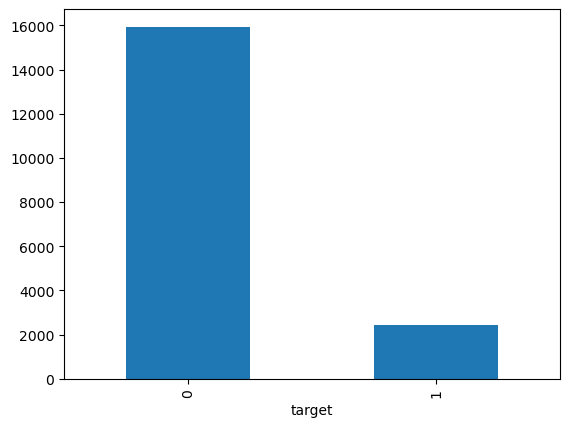

In [19]:
train.target.value_counts().plot(kind='bar')

* looks like an imbalanced dataset

In [21]:
tgt_col = ['target']
ign_cols = ['enrollee_id']

In [27]:
# statistical info

train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,18359.0,16729.360096,9643.749725,1.000,8378.500,16706.00,25148.50,33380.000
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000


In [23]:
train.drop(columns=ign_cols).describe().T

,count,mean,std,min,25%,50%,75%,max
city_development_index,18359.0,0.847140,0.110189,0.448,0.796,0.91,0.92,0.949
training_hours,18359.0,65.899014,60.885300,1.000,23.000,47.00,89.00,336.000
target,18359.0,0.132088,0.338595,0.000,0.000,0.00,0.00,1.000


In [24]:
train.describe(include='object').T

,count,unique,top,freq
city,18359,123,city_103,4358
gender,14261,3,Male,12884
relevent_experience,18359,2,Has relevent experience,13596
enrolled_university,18017,3,no_enrollment,13659
education_level,17902,5,Graduate,10769
major_discipline,15521,6,STEM,13738
experience,18300,22,>20,3437
company_size,13580,8,50-99,3120
company_type,13320,6,Pvt Ltd,10051
last_new_job,17992,6,1,7567


In [25]:
train.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [28]:
# check unique values

for col in train.drop(columns=ign_cols).columns:
    print(col,train[col].nunique(),  '=>', train[col].unique())

city 123 => ['city_149' 'city_83' 'city_16' 'city_64' 'city_100' 'city_21' 'city_114'
 'city_103' 'city_97' 'city_160' 'city_65' 'city_90' 'city_75' 'city_136'
 'city_159' 'city_67' 'city_28' 'city_10' 'city_73' 'city_76' 'city_104'
 'city_27' 'city_30' 'city_61' 'city_99' 'city_41' 'city_142' 'city_9'
 'city_116' 'city_128' 'city_74' 'city_69' 'city_1' 'city_176' 'city_40'
 'city_123' 'city_152' 'city_165' 'city_89' 'city_36' 'city_44' 'city_46'
 'city_45' 'city_134' 'city_93' 'city_180' 'city_162' 'city_84' 'city_138'
 'city_173' 'city_19' 'city_71' 'city_158' 'city_23' 'city_102' 'city_105'
 'city_91' 'city_11' 'city_13' 'city_57' 'city_20' 'city_14' 'city_37'
 'city_115' 'city_50' 'city_167' 'city_12' 'city_143' 'city_126' 'city_77'
 'city_101' 'city_150' 'city_179' 'city_107' 'city_175' 'city_146'
 'city_98' 'city_166' 'city_118' 'city_129' 'city_127' 'city_24' 'city_81'
 'city_26' 'city_139' 'city_94' 'city_70' 'city_145' 'city_157' 'city_111'
 'city_78' 'city_80' 'city_33' 'city

In [30]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='training_hours', ylabel='Density'>

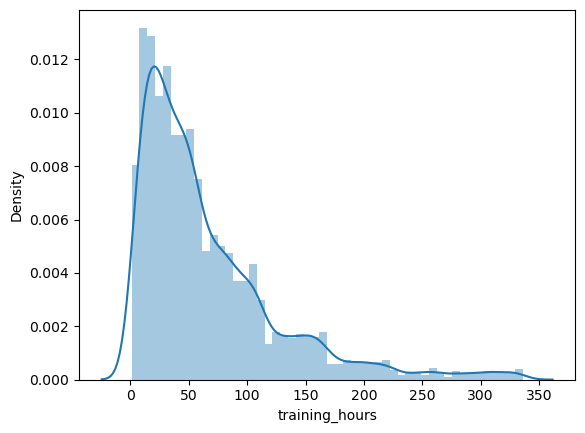

In [31]:
sns.distplot(train.training_hours)

* most of them have 50 hours of training
* those who have 150+ hours of trainin are very low

<Axes: xlabel='city_development_index', ylabel='Density'>

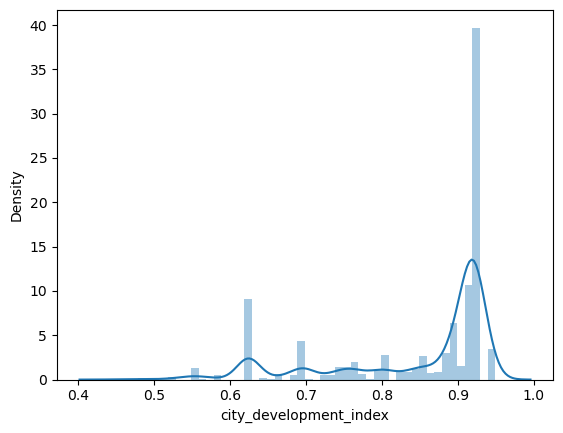

In [32]:
sns.distplot(train.city_development_index)       

* most of the students are from city with development index in 0.9

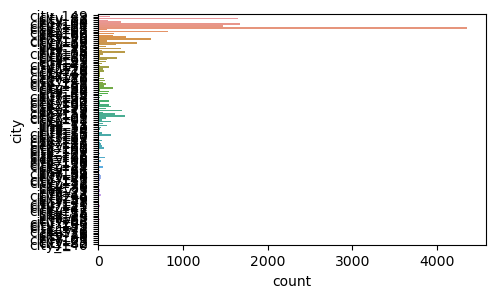

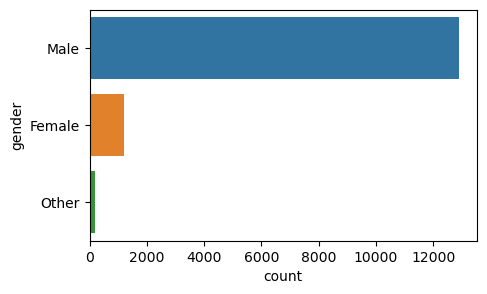

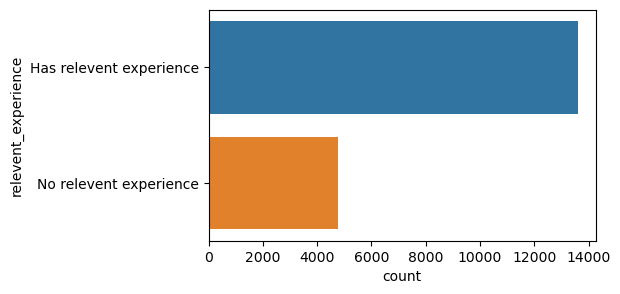

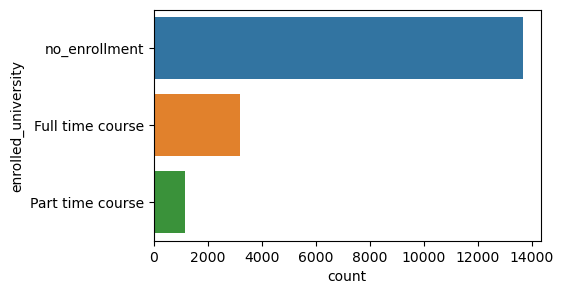

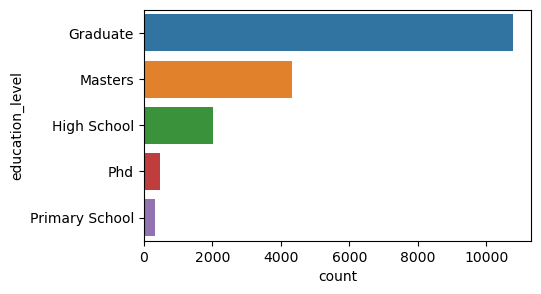

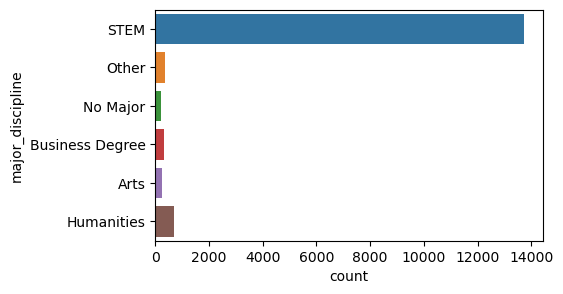

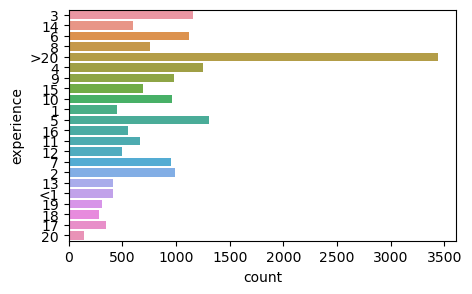

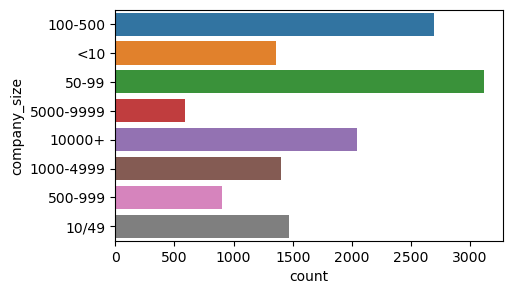

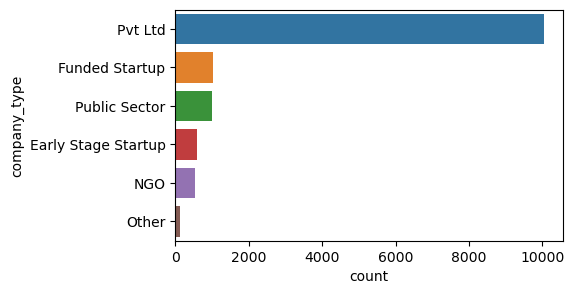

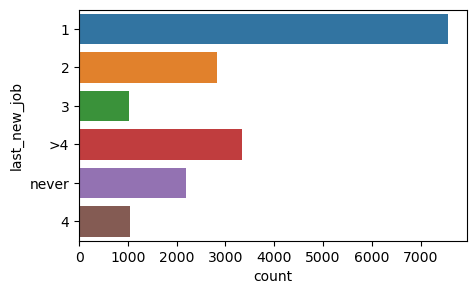

In [36]:
for col in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(5,3))
    sns.countplot(y=train[col])
    plt.show()

* most have not enrolled to any university 
* 50% are graduates 
* 80% belong to the STEM group

* around 20% are with 20+ years of experience
* around 50% work in pvt organization

<Axes: ylabel='experience,target'>

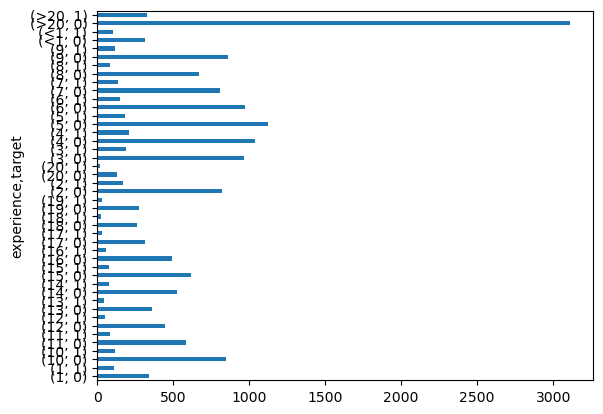

In [39]:
train[['experience','target']].groupby('experience').value_counts().plot(kind='barh')

In [47]:
exp_tgt = train[['experience','target']].groupby('experience').value_counts().unstack()
exp_tgt['%'] = exp_tgt[1]/(exp_tgt[0]+exp_tgt[1])*100
exp_tgt.sort_values(exp_tgt.columns[2], ascending=False)

target,0,1,%
experience,,,
<1,315,101,24.278846
1,344,108,23.893805
2,821,171,17.237903
4,1039,211,16.880000
3,968,191,16.479724
7,811,139,14.631579
5,1125,184,14.056532
6,972,153,13.600000
14,527,75,12.458472


* learners with exp of 1yr or less are seeking ajob change after the course

### Preprocessing

- steps

* address missing data
* encoding on category columns
* standardize numerical columns
* treat data imbalance 


In [126]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [93]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [106]:
# separate category and numeric features

cat_cols = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
            'education_level', 'major_discipline', 'experience', 
            'company_size', 'company_type', 'last_new_job']

num_cols = ['city_development_index','training_hours']

In [107]:
print(tgt_col, ign_cols, cat_cols, num_cols, sep='\n')

['target']
['enrollee_id']
['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
['city_development_index', 'training_hours']


#### Pipelining

In [108]:
# categorical preperation

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [109]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])


In [110]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [111]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [112]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69


In [113]:
y = train[tgt_col]
y.head(2)

,target
0,0
1,0


#### train test split

In [143]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [115]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.1)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((16523, 12), (1836, 12), (16523, 1), (1836, 1))

In [116]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression())])

In [117]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression())])

In [132]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[0.83966221, 0.16033779],
       [0.89291149, 0.10708851],
       [0.91619078, 0.08380922],
       ...,
       [0.88672862, 0.11327138],
       [0.92760297, 0.07239703],
       [0.91349899, 0.08650101]])

In [135]:
model_pipeline.predict_proba(val_X)[:,0]

array([0.83966221, 0.89291149, 0.91619078, ..., 0.88672862, 0.92760297,
       0.91349899])

In [136]:
model_pipeline.predict_proba(val_X)[:,1]

array([0.16033779, 0.10708851, 0.08380922, ..., 0.11327138, 0.07239703,
       0.08650101])

In [ ]:
            predict_proba          predict
            0            1
       [0.83966221, 0.16033779],   0
       [0.89291149, 0.10708851],   0
       [0.91619078, 0.08380922],   0
       ...,
       [0.08672862, 0.91327138],   1
       [0.92760297, 0.07239703],
       [0.91349899, 0.08650101]])

In [133]:
# predict target 

model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [140]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)    

Train AUC
0.5020002259356277
Valid AUC
0.50199203187251
Train cnf_matrix
[[14347     2]
 [ 2165     9]]
Valid cnf_matrix
[[1585    0]
 [ 250    1]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     14349
           1       0.82      0.00      0.01      2174

    accuracy                           0.87     16523
   macro avg       0.84      0.50      0.47     16523
weighted avg       0.86      0.87      0.81     16523

Valid cls rep
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1585
           1       1.00      0.00      0.01       251

    accuracy                           0.86      1836
   macro avg       0.93      0.50      0.47      1836
weighted avg       0.88      0.86      0.80      1836



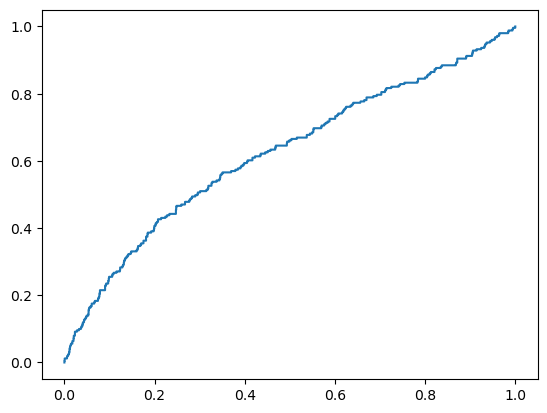

In [141]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

### Using GridSearch to hyper tune single model

In [161]:
# set the hyper parameters

params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]
'''
myidea():
    a,
    b
    
myidea.a
myidea.b

myidea__a
myidea__b
'''

In [162]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [163]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',
                                                                          'company_type',
                                                                          'last_new_job']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [164]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [168]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.631173,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.617961,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.623170,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.617961,3


In [171]:
# read the submission file
#predict with the last model
#and upload into the hack website

sub = pd.read_csv('sample_submission_sxfcbdx.csv')
sub.head(3)

,enrollee_id,target
0,16548,0
1,12036,0
2,11061,0


* result uploaded in the analytics vidhya website and the recieved score

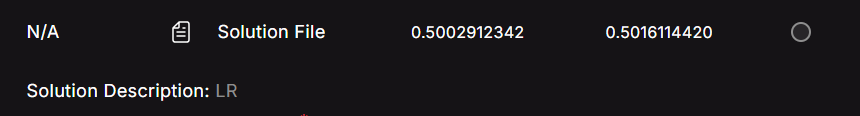

In [172]:
 test.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17


In [174]:
train.columns.difference(test.columns)

Index(['target'], dtype='object')

In [175]:
# updating the existing target values with predicted values
sub['target'] = model_pipeline.predict(test)

In [176]:
sub.to_csv('sub_1.csv',index=False)

In [177]:
sub

,enrollee_id,target
0,16548,1
1,12036,0
2,11061,0
3,5032,0
4,17599,0
...,...,...
15016,11308,0
15017,14612,0
15018,33346,0
15019,14506,0


### pickling the model

In [178]:
import joblib

In [241]:
joblib.dump(model_pipeline,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

### perform oversampling to balance the dataset

In [180]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# !pip install imblearn

In [181]:
over_sampling = RandomOverSampler()

In [182]:
import imblearn
imblearn.__version__

'0.10.1'

In [183]:
import sklearn
sklearn.__version__

'1.2.2'

In [184]:
train_y.value_counts()

target
0         14349
1          2174
Name: count, dtype: int64

In [186]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [187]:
train_y_os.value_counts()

target
0         14349
1         14349
Name: count, dtype: int64

In [188]:
from sklearn.tree import DecisionTreeClassifier

#### Using GridSearch to hyper tune multi model

In [198]:
params_2 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    }
]

#
#Ridge()
#Lasso()

In [209]:
params_2

[{'model': [LogisticRegression(C=0.5)],
  'model__penalty': ['l2', None],
  'model__C': [0.5, 3]},
 {'model': [DecisionTreeClassifier()], 'model__max_depth': [3, 5]}]

In [210]:
grid_2 = GridSearchCV(estimator=model_pipeline, param_grid=params_2, 
                    cv=2, scoring='roc_auc')

In [211]:
grid_2.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [212]:
grid_2

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['city_development_index',
                                                                          'training_hours'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression(C=0.5)],
                          'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]},
                         {'model': [DecisionTreeClassifier()],
                          'model__max_depth': [3, 5]}],
             scoring='roc_auc')

In [213]:
grid_2.best_params_

{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}

In [214]:
grid_2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model', LogisticRegression(C=0.5))])

In [215]:
grid_2.cv_results_

{'mean_fit_time': array([0.31412888, 0.53924561, 0.49142945, 0.52162731, 0.25375307,
        0.27718818]),
 'std_fit_time': array([0.05111337, 0.03199196, 0.01483405, 0.08042228, 0.01373398,
        0.04605901]),
 'mean_score_time': array([0.09588349, 0.13984227, 0.1314106 , 0.15299273, 0.1411376 ,
        0.11064172]),
 'std_score_time': array([0.02678025, 0.00011897, 0.01747847, 0.02111936, 0.00329471,
        0.00965858]),
 'param_model': masked_array(data=[LogisticRegression(C=0.5), LogisticRegression(C=0.5),
                    LogisticRegression(C=0.5), LogisticRegression(C=0.5),
                    DecisionTreeClassifier(), DecisionTreeClassifier()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_model__C': masked_array(data=[0.5, 0.5, 3, 3, --, --],
              mask=[False, False, False, False,  True,  True],
        fill_value='?',
             dtype=object),
 'param_model__penalty': masked_array(dat

In [203]:
new_model = grid_2.best_estimator_

Train AUC
0.6349068429067144
Valid AUC
0.6005869267409856
Train cnf_matrix
[[9693 4656]
 [ 882 1292]]
Valid cnf_matrix
[[1064  521]
 [ 118  133]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     14349
           1       0.22      0.59      0.32      2174

    accuracy                           0.66     16523
   macro avg       0.57      0.63      0.55     16523
weighted avg       0.82      0.66      0.72     16523

Valid cls rep
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1585
           1       0.20      0.53      0.29       251

    accuracy                           0.65      1836
   macro avg       0.55      0.60      0.53      1836
weighted avg       0.80      0.65      0.70      1836



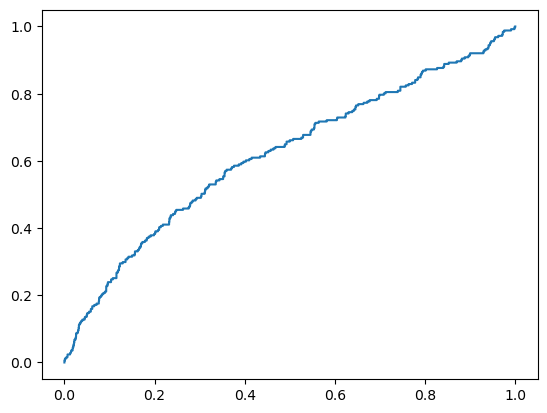

In [206]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model)

Train AUC
0.6360373545194787
Valid AUC
0.6005869267409856
Train cnf_matrix
[[9693 4656]
 [5789 8560]]
Valid cnf_matrix
[[1064  521]
 [ 118  133]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.63      0.68      0.65     14349
           1       0.65      0.60      0.62     14349

    accuracy                           0.64     28698
   macro avg       0.64      0.64      0.64     28698
weighted avg       0.64      0.64      0.64     28698

Valid cls rep
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1585
           1       0.20      0.53      0.29       251

    accuracy                           0.65      1836
   macro avg       0.55      0.60      0.53      1836
weighted avg       0.80      0.65      0.70      1836



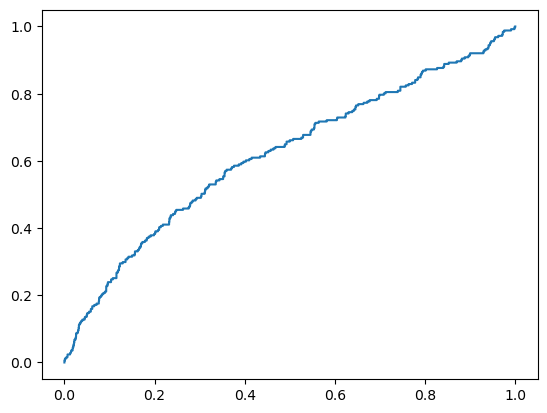

In [207]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,new_model)

#model_train_val_eval(val_X,val_y,new_model)-- train_X

In [218]:
res_df_2 = pd.DataFrame(grid_2.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df_2[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': 'l2'}",0.664263,1
1,"{'model': LogisticRegression(C=0.5), 'model__C': 0.5, 'model__penalty': None}",0.662745,3
2,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': 'l2'}",0.663271,2
3,"{'model': LogisticRegression(C=0.5), 'model__C': 3, 'model__penalty': None}",0.662745,3
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.628346,6
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.649450,5


In [219]:
# updating the existing target values with predicted values
sub['target'] = new_model.predict(test)
sub.to_csv('sub_2.csv',index=False)


* result uploaded in the analytics vidhya website and the recieved score

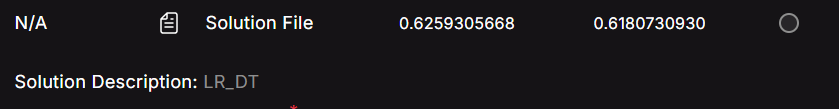

#### Using GridSearch to hyper tune multi model along with ensembling

In [221]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier

In [226]:
params_3 = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    },
    {
    'model': [DecisionTreeClassifier()],
    'model__max_depth':[3,5]
    },
    {
    'model': [StackingClassifier(
    estimators=[
        ['sclf1',RandomForestClassifier()],
        ['sclf2',GradientBoostingClassifier()],
        ['sclf3',AdaBoostClassifier()],],   
        final_estimator=LogisticRegression()

    )],
    'model__sclf1__max_depth':[4,8],
    'model__sclf2__n_estimators':[15,25],    
    'model__sclf3__n_estimators':[5,35],    
    }

]


In [227]:
grid_3 = GridSearchCV(estimator=model_pipeline, param_grid=params_3, 
                    cv=2, scoring='roc_auc')

In [228]:
grid_3.fit(train_X_os, train_y_os)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['city',
                                                                          'gender',
                                                                          'relevent_experience',
                                                                          'enrolled_university',
                                                                          'education_level',
                                                                          'major_discipline',
                                                                          'experience',
                                                                          'company_size',...
                         {'model': [StackingClassifier(estimators=[['sclf1',
                                                                    RandomForestClassifier(max_depth=8)],
                                                                   ['sclf2',
                                                                    GradientBoostingClassifier(n_estimators=15)],
                                                                   ['sclf3',
                                                                    AdaBoostClassifier(n_estimators=5)]],
                                                       final_estimator=LogisticRegression())],
                          'model__sclf1__max_depth': [4, 8],
                          'model__sclf2__n_estimators': [15, 25],
                          'model__sclf3__n_estimators': [5, 35]}],
             scoring='roc_auc')

In [229]:
grid_3.best_params_

{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)],
                                ['sclf2',
                                 GradientBoostingClassifier(n_estimators=15)],
                                ['sclf3', AdaBoostClassifier(n_estimators=5)]],
                    final_estimator=LogisticRegression()),
 'model__sclf1__max_depth': 8,
 'model__sclf2__n_estimators': 15,
 'model__sclf3__n_estimators': 5}

In [230]:
grid_3.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['city', 'gender',
                                                   'relevent_experience',
                                                   'enrolled_university',
                                                   'education_level',
                                                   'major_discipline',
                                                   'experience', 'company_size',
                                                   'company_type',
                                                   'last_new_job...
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['city_development_index',
                                                   'training_hours'])])),
                ('model',
                 StackingClassifier(estimators=[['sclf1',
                                                 RandomForestClassifier(max_depth=8)],
                                                ['sclf2',
                                                 GradientBoostingClassifier(n_estimators=15)],
                                                ['sclf3',
                                                 AdaBoostClassifier(n_estimators=5)]],
                                    final_estimator=LogisticRegression()))])

In [231]:
new_model_3 = grid_3.best_estimator_

Train AUC
0.6682537778982255
Valid AUC
0.5856850201716792
Train cnf_matrix
[[10881  3468]
 [  917  1257]]
Valid cnf_matrix
[[1162  423]
 [ 141  110]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     14349
           1       0.27      0.58      0.36      2174

    accuracy                           0.73     16523
   macro avg       0.59      0.67      0.60     16523
weighted avg       0.84      0.73      0.77     16523

Valid cls rep
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1585
           1       0.21      0.44      0.28       251

    accuracy                           0.69      1836
   macro avg       0.55      0.59      0.54      1836
weighted avg       0.80      0.69      0.73      1836



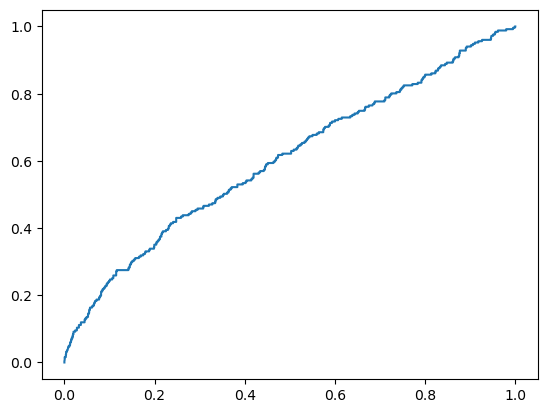

In [232]:
model_train_val_eval(train_X,val_X,train_y,val_y,new_model_3)

In [236]:

res_df_3 = pd.DataFrame(grid_3.cv_results_,)
pd.set_option('display.max_colwidth',500)
res_df_3[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}",0.664263,8
1,"{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}",0.662745,11
2,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}",0.663271,10
3,"{'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}",0.662745,11
4,"{'model': DecisionTreeClassifier(), 'model__max_depth': 3}",0.628346,14
5,"{'model': DecisionTreeClassifier(), 'model__max_depth': 5}",0.649496,13
6,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 5}",0.665476,7
7,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 15, 'model__sclf3__n_estimators': 35}",0.663865,9
8,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 5}",0.670582,5
9,"{'model': StackingClassifier(estimators=[['sclf1', RandomForestClassifier(max_depth=8)], ['sclf2', GradientBoostingClassifier(n_estimators=15)], ['sclf3', AdaBoostClassifier(n_estimators=5)]], final_estimator=LogisticRegression()), 'model__sclf1__max_depth': 4, 'model__sclf2__n_estimators': 25, 'model__sclf3__n_estimators': 35}",0.669350,6


In [237]:
# updating the existing target values with predicted values
sub['target'] = new_model_3.predict(test)
sub.to_csv('sub_3.csv',index=False)


* result uploaded in the analytics vidhya website and the recieved score

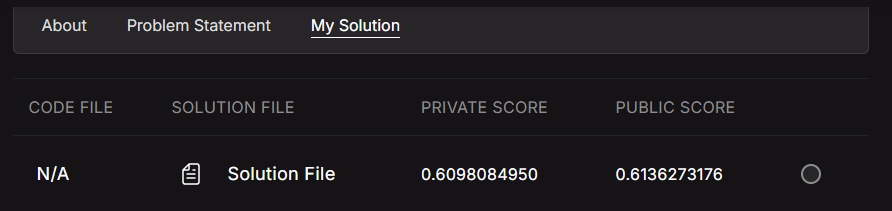

In [238]:
joblib.dump(new_model_3,'jobchg_pipeline_model.pkl')

['jobchg_pipeline_model.pkl']

In [240]:
train.iloc[0]

enrollee_id                                 23798
city                                     city_149
city_development_index                      0.689
gender                                       Male
relevent_experience       Has relevent experience
enrolled_university                 no_enrollment
education_level                          Graduate
major_discipline                             STEM
experience                                      3
company_size                              100-500
company_type                              Pvt Ltd
last_new_job                                    1
training_hours                                106
target                                          0
Name: 0, dtype: object